In [18]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
import time
import statsmodels.tsa.arima.model as ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pmdarima.arima.utils import ndiffs
%matplotlib inline
plt.rcParams['figure.figsize'] = [15,15]

In [19]:
df = pd.read_csv(r'C:\Users\mayan\Downloads\NAB.csv')
df.shape

(2522, 9)

In [20]:
df.describe()

,Open,High,Low,Close,Volume,Value,Trades
count,2522.000000,2522.000000,2522.000000,2522.000000,2.522000e+03,2.522000e+03,2522.000000
mean,28.696554,28.888866,28.476192,28.764592,6.014265e+06,1.660470e+08,15297.570975
std,4.699717,4.699750,4.704137,4.509114,3.502949e+06,8.015483e+07,5967.412997
min,0.000000,0.000000,0.000000,13.880000,0.000000e+00,0.000000e+00,0.000000
25%,26.432500,26.590000,26.222500,26.445000,4.012192e+06,1.169233e+08,11772.000000
50%,29.000000,29.137500,28.720000,28.930000,5.151844e+06,1.470271e+08,14127.500000
75%,31.800000,31.967500,31.560000,31.777500,6.922956e+06,1.938648e+08,17224.000000
max,39.690000,39.710000,39.450000,39.570000,4.162041e+07,1.142858e+09,90865.000000


In [21]:
df.head()

,Code,Date,Open,High,Low,Close,Volume,Value,Trades
0,NAB,17/05/2013,33.01,33.19,33.01,33.09,4421169,1.463216e+08,15666
1,NAB,20/05/2013,33.20,33.53,33.20,33.37,5025146,1.678978e+08,22070
2,NAB,21/05/2013,33.36,33.40,33.03,33.09,7629348,2.529711e+08,19008
3,NAB,22/05/2013,33.23,33.23,32.61,32.71,6255598,2.054231e+08,18233
4,NAB,23/05/2013,32.55,32.68,31.63,31.70,13410353,4.281326e+08,30067


In [22]:
df['Average'] = (df['Open'] + df['High'] + df['Low'] + df['Close'])/4
df['Valptra'] = df['Value'] / df['Trades']
df.head()

,Code,Date,Open,High,Low,Close,Volume,Value,Trades,Average,Valptra
0,NAB,17/05/2013,33.01,33.19,33.01,33.09,4421169,1.463216e+08,15666,33.075,9340.073947
1,NAB,20/05/2013,33.20,33.53,33.20,33.37,5025146,1.678978e+08,22070,33.325,7607.514527
2,NAB,21/05/2013,33.36,33.40,33.03,33.09,7629348,2.529711e+08,19008,33.220,13308.666482
3,NAB,22/05/2013,33.23,33.23,32.61,32.71,6255598,2.054231e+08,18233,32.945,11266.553467
4,NAB,23/05/2013,32.55,32.68,31.63,31.70,13410353,4.281326e+08,30067,32.140,14239.286060


In [23]:
dfc =df.corr()
dfc

,Open,High,Low,Close,Volume,Value,Trades,Average,Valptra
Open,1.000000,0.999258,0.999108,0.938239,-0.342787,-0.008521,-0.264861,0.996028,0.279734
High,0.999258,1.000000,0.998952,0.938433,-0.333123,0.001121,-0.253655,0.996036,0.281793
Low,0.999108,0.998952,1.000000,0.940096,-0.354785,-0.020421,-0.279113,0.996405,0.278079
Close,0.938239,0.938433,0.940096,1.000000,-0.388310,-0.045425,-0.321459,0.964765,0.279730
Volume,-0.342787,-0.333123,-0.354785,-0.388310,1.000000,0.903360,0.755741,-0.358512,0.408861
Value,-0.008521,0.001121,-0.020421,-0.045425,0.903360,1.000000,0.677304,-0.018243,0.602166
Trades,-0.264861,-0.253655,-0.279113,-0.321459,0.755741,0.677304,1.000000,-0.282580,-0.124420
Average,0.996028,0.996036,0.996405,0.964765,-0.358512,-0.018243,-0.282580,1.000000,0.279946
Valptra,0.279734,0.281793,0.278079,0.279730,0.408861,0.602166,-0.124420,0.279946,1.000000


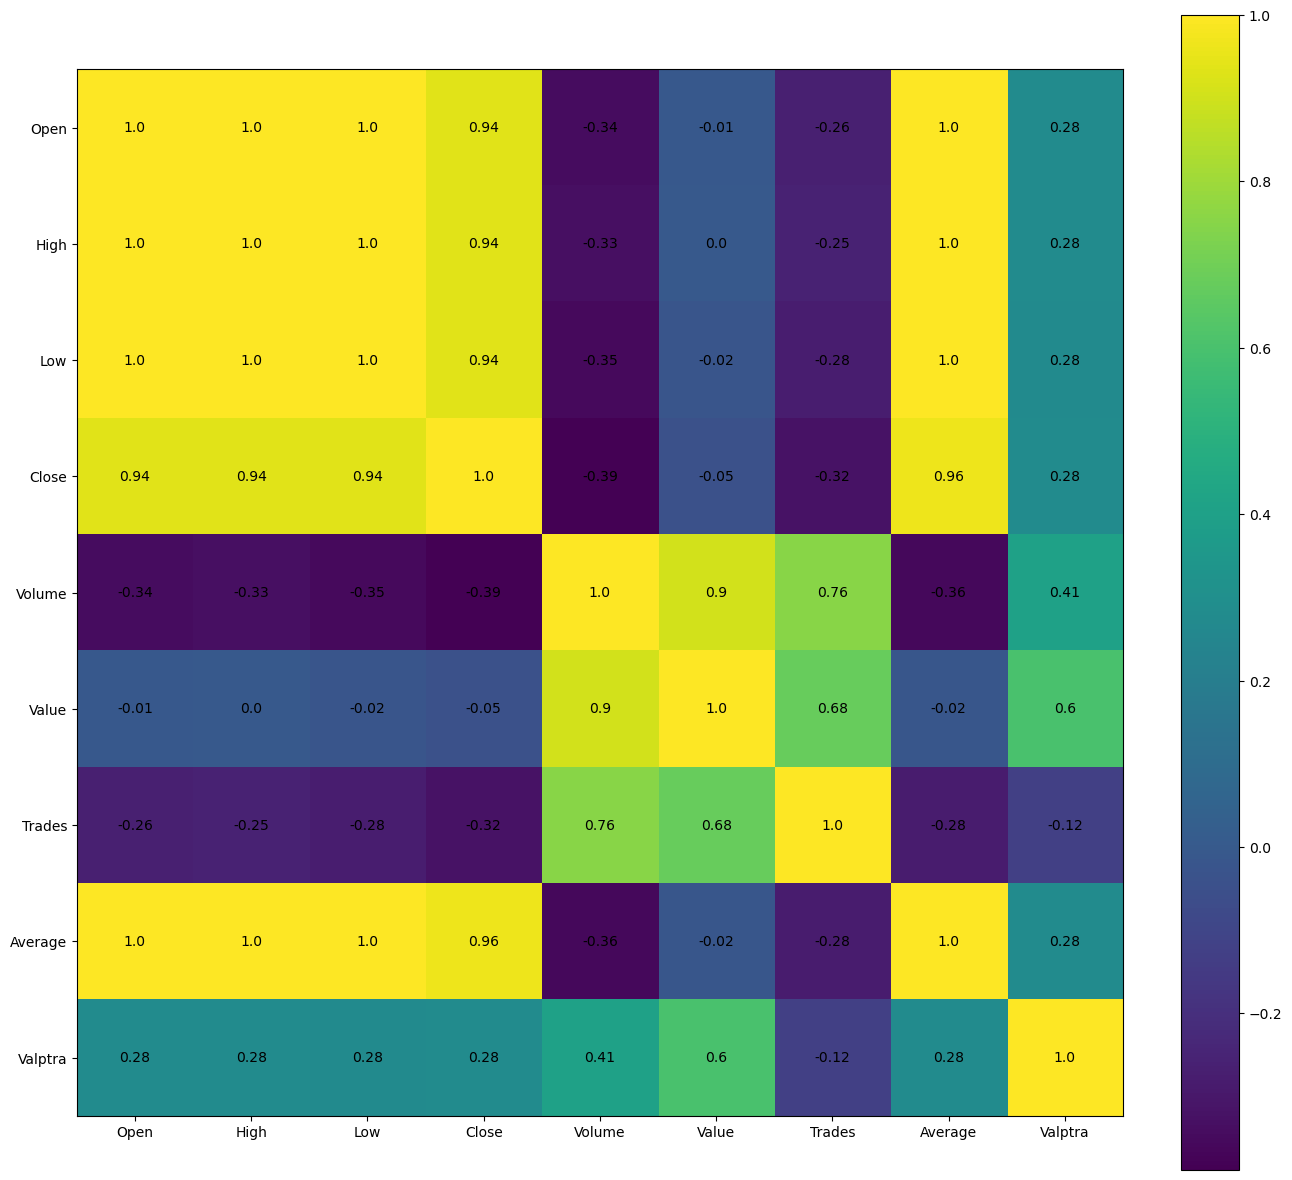

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(dfc, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

ax.set_xticks(np.arange(len(dfc)), labels = dfc.columns)
ax.set_yticks(np.arange(len(dfc)), labels = dfc.columns)
for i in range(len(dfc.columns)):
    for j in range(len(dfc.columns)):
        text = ax.text(j, i, round(dfc.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")

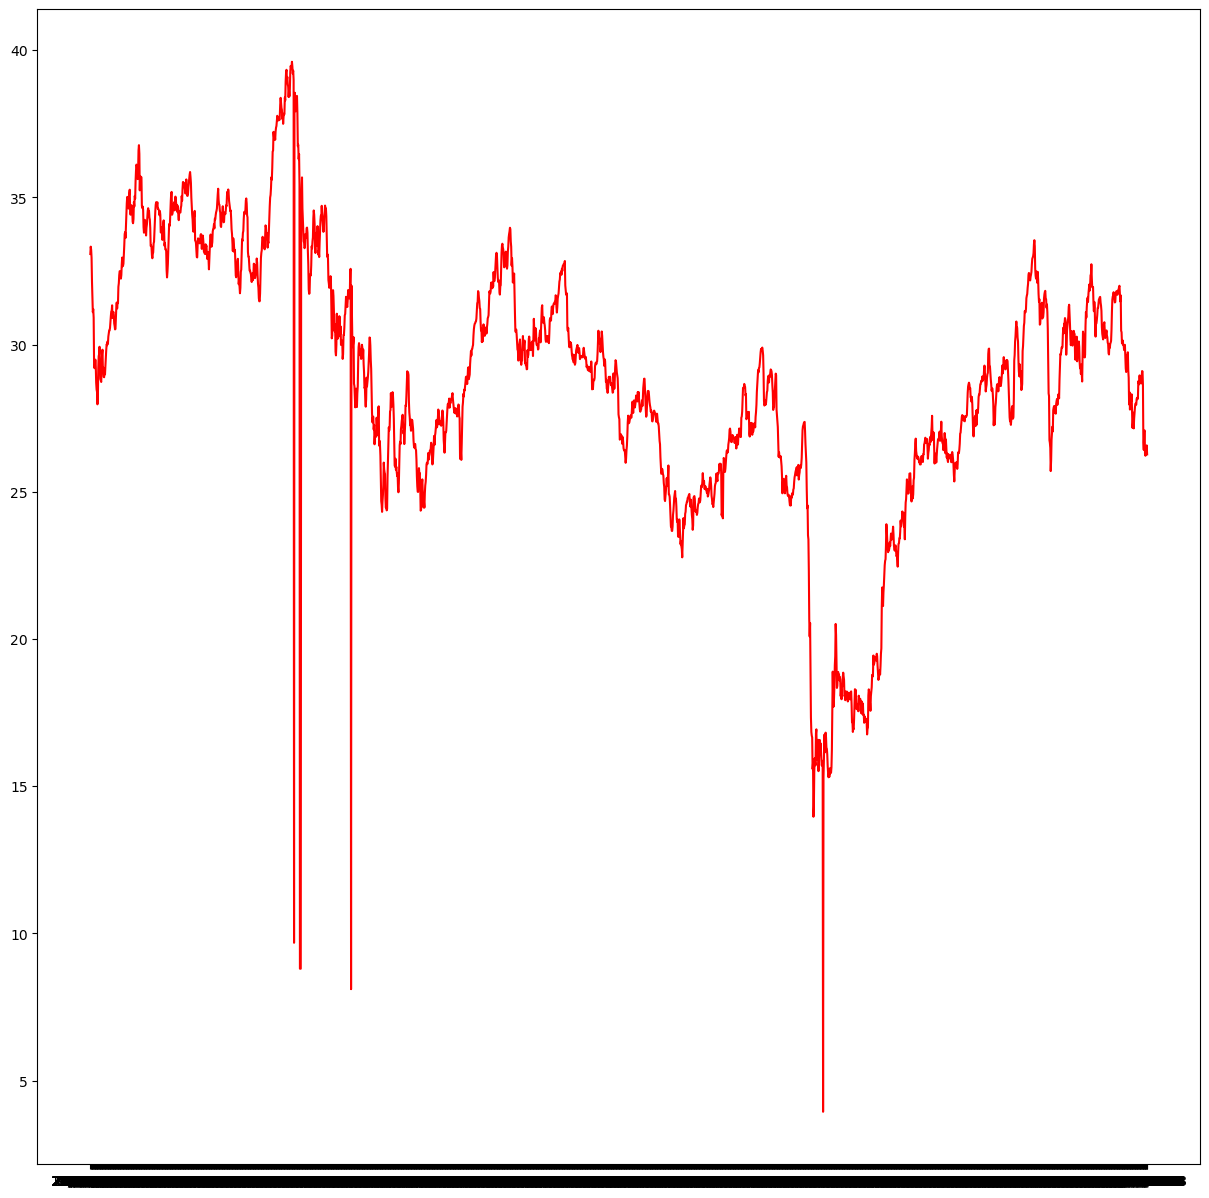

In [25]:
fig, ax1 = plt.subplots()
ax1.plot(df['Date'], df['Average'], color = 'red')

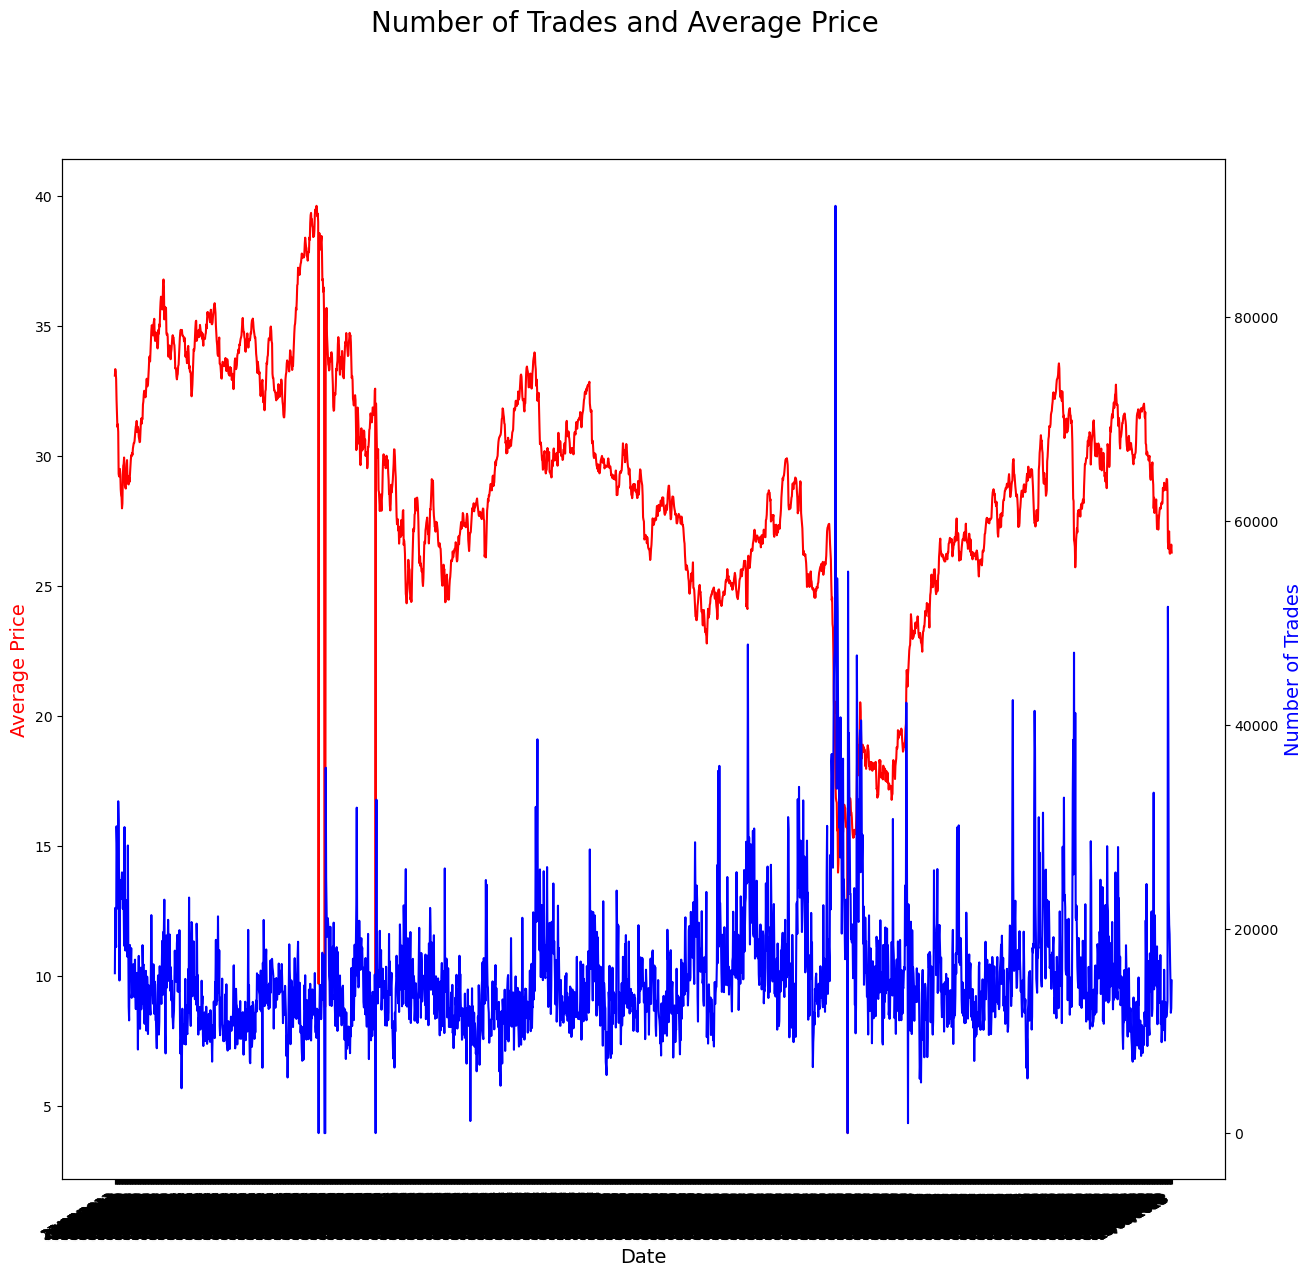

In [26]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df['Date'], df['Average'], color = 'red')
ax2.plot(df['Date'], df['Trades'], color = 'blue')
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Average Price", color='red', fontsize=14)
ax2.set_ylabel("Number of Trades", color='Blue', fontsize=14)
fig.suptitle("Number of Trades and Average Price", fontsize=20)
fig.autofmt_xdate()

In [27]:
df.head()

,Code,Date,Open,High,Low,Close,Volume,Value,Trades,Average,Valptra
0,NAB,17/05/2013,33.01,33.19,33.01,33.09,4421169,1.463216e+08,15666,33.075,9340.073947
1,NAB,20/05/2013,33.20,33.53,33.20,33.37,5025146,1.678978e+08,22070,33.325,7607.514527
2,NAB,21/05/2013,33.36,33.40,33.03,33.09,7629348,2.529711e+08,19008,33.220,13308.666482
3,NAB,22/05/2013,33.23,33.23,32.61,32.71,6255598,2.054231e+08,18233,32.945,11266.553467
4,NAB,23/05/2013,32.55,32.68,31.63,31.70,13410353,4.281326e+08,30067,32.140,14239.286060


In [28]:
df = df[['Close']].copy()
df

,Close
0,33.09
1,33.37
2,33.09
3,32.71
4,31.70
...,...
2517,26.37
2518,26.41
2519,26.46
2520,26.46


<AxesSubplot:>

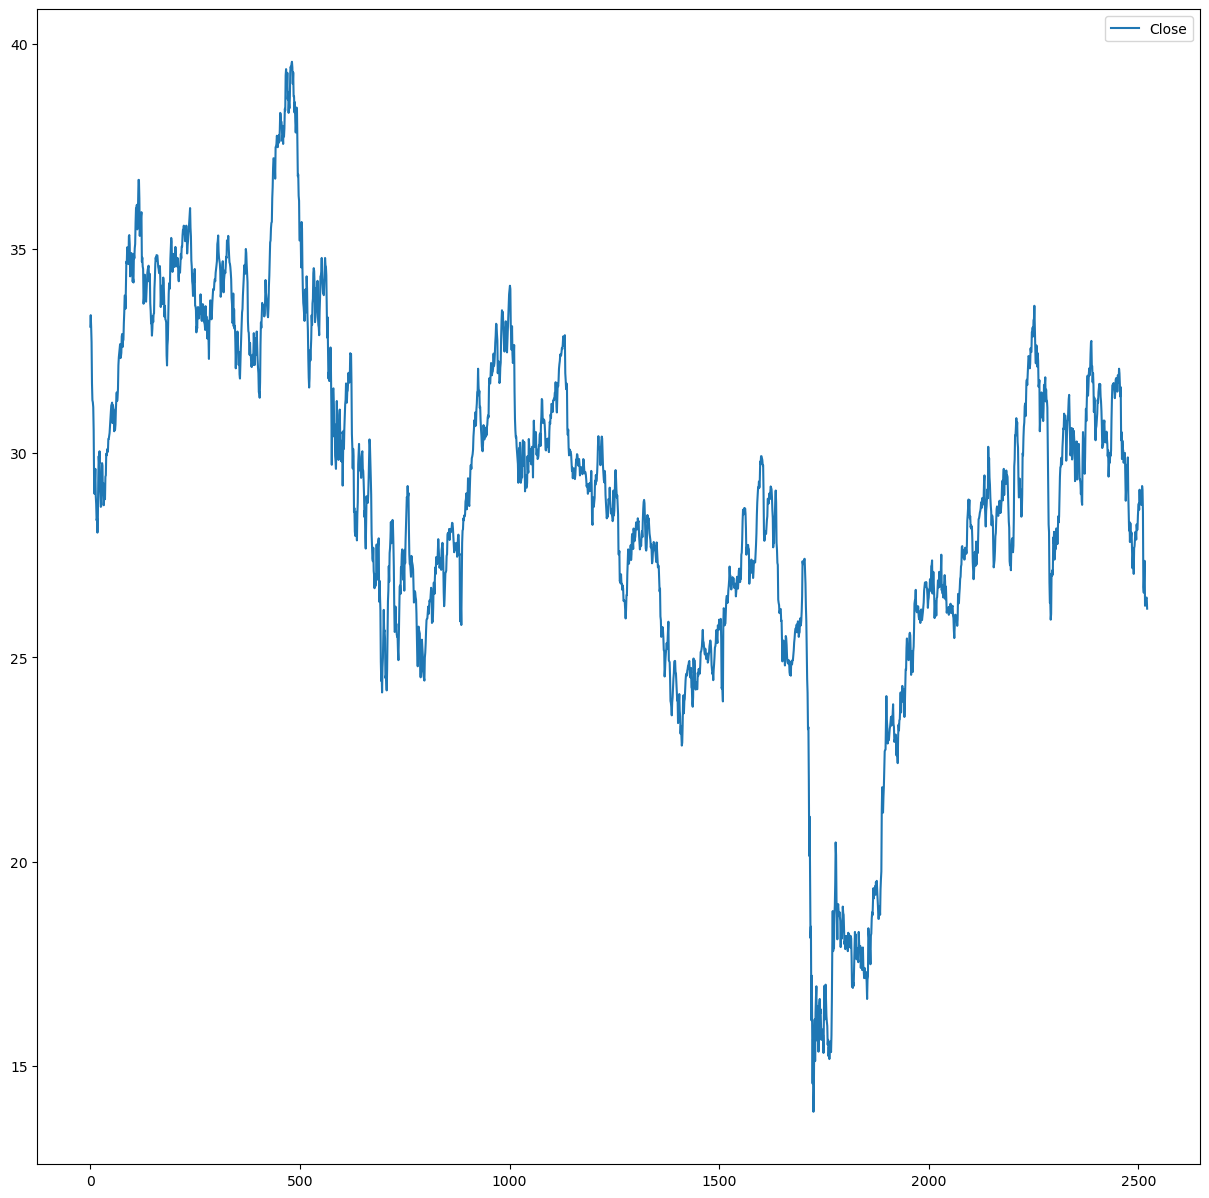

In [29]:
df.plot()

In [30]:
y = adfuller(df)
print(f'Statstic {y[0]}')
print(f'pvalue {y[1]}')

Statstic -2.3495875191886877
pvalue 0.1564731303489192


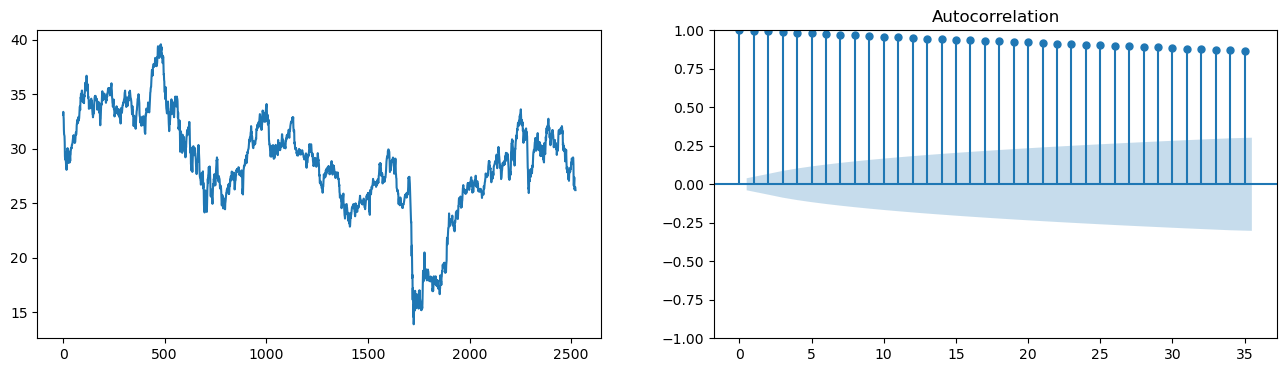

In [31]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1. plot(df.Close)
plot_acf(df.Close, ax= ax2);

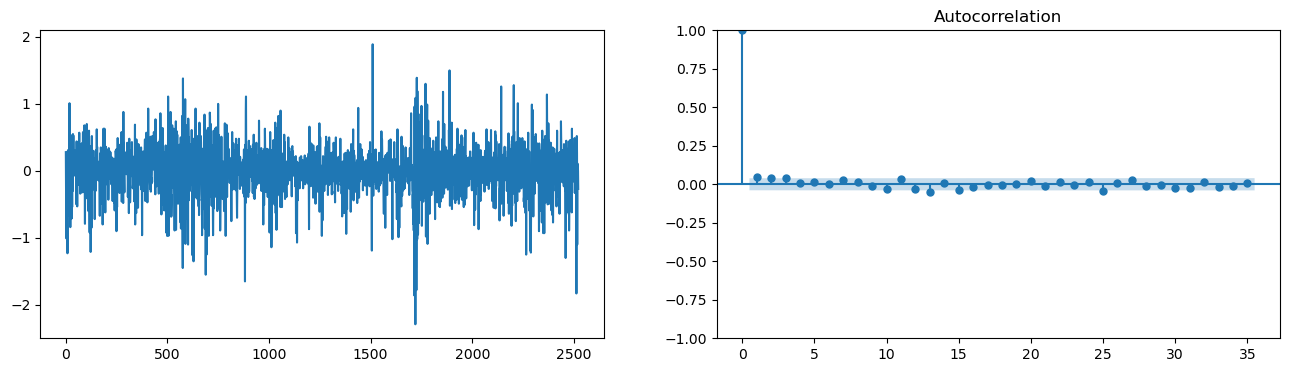

In [32]:
diff = df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1. plot(diff)
plot_acf(diff, ax= ax2);

In [33]:
ndiffs(df.Close, test = 'adf')

1

C:\Users\mayan\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


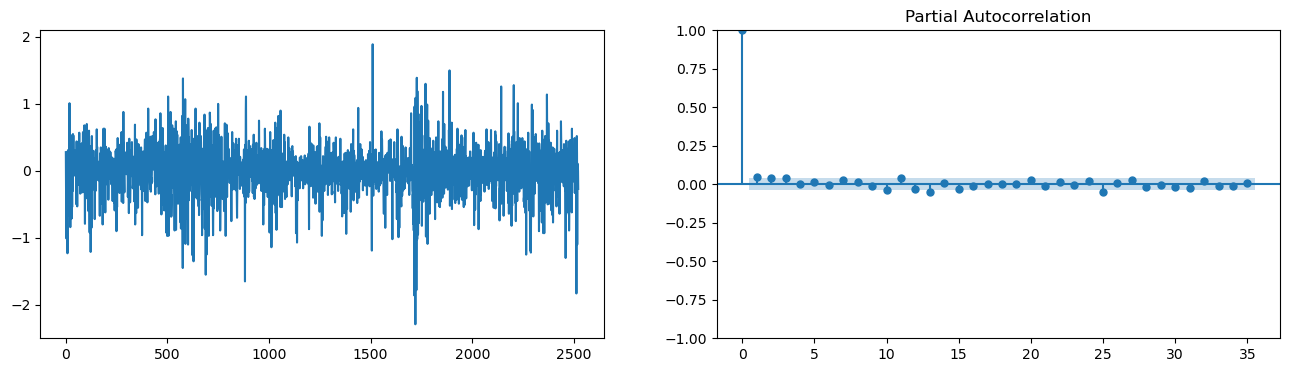

In [34]:
diff = df.Close.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1. plot(diff)
plot_pacf(diff, ax= ax2);

p = 6 d = 1 q = 6

In [35]:
n = int(len(df)*0.65)
train = df.Close[:n]
test = df.Close[n:]

In [36]:
len(test)

883

In [47]:
model = sm.tsa.arima.ARIMA(train, order = (3,1,3))
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1639
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -573.106
Date:                Mon, 22 May 2023   AIC                           1160.212
Time:                        00:40:24   BIC                           1198.021
Sample:                             0   HQIC                          1174.235
                               - 1639                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0075      0.448     -0.017      0.987      -0.886       0.871
ar.L2          0.5023      0.374      1.342      0.180      -0.231       1.236
ar.L3         -0.4398      0.183     -2.401      0.016      -0.799      -0.081
ma.L1          0.0839      0.451      0.186      0.853      -0.801       0.969
ma.L2         -0.4615      0.415     -1.113      0.266      -1.274       0.351
ma.L3          0.3917      0.182      2.154      0.031       0.035       0.748
sigma2         0.1179      0.003     41.083      0.000       0.112       0.123
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               403.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

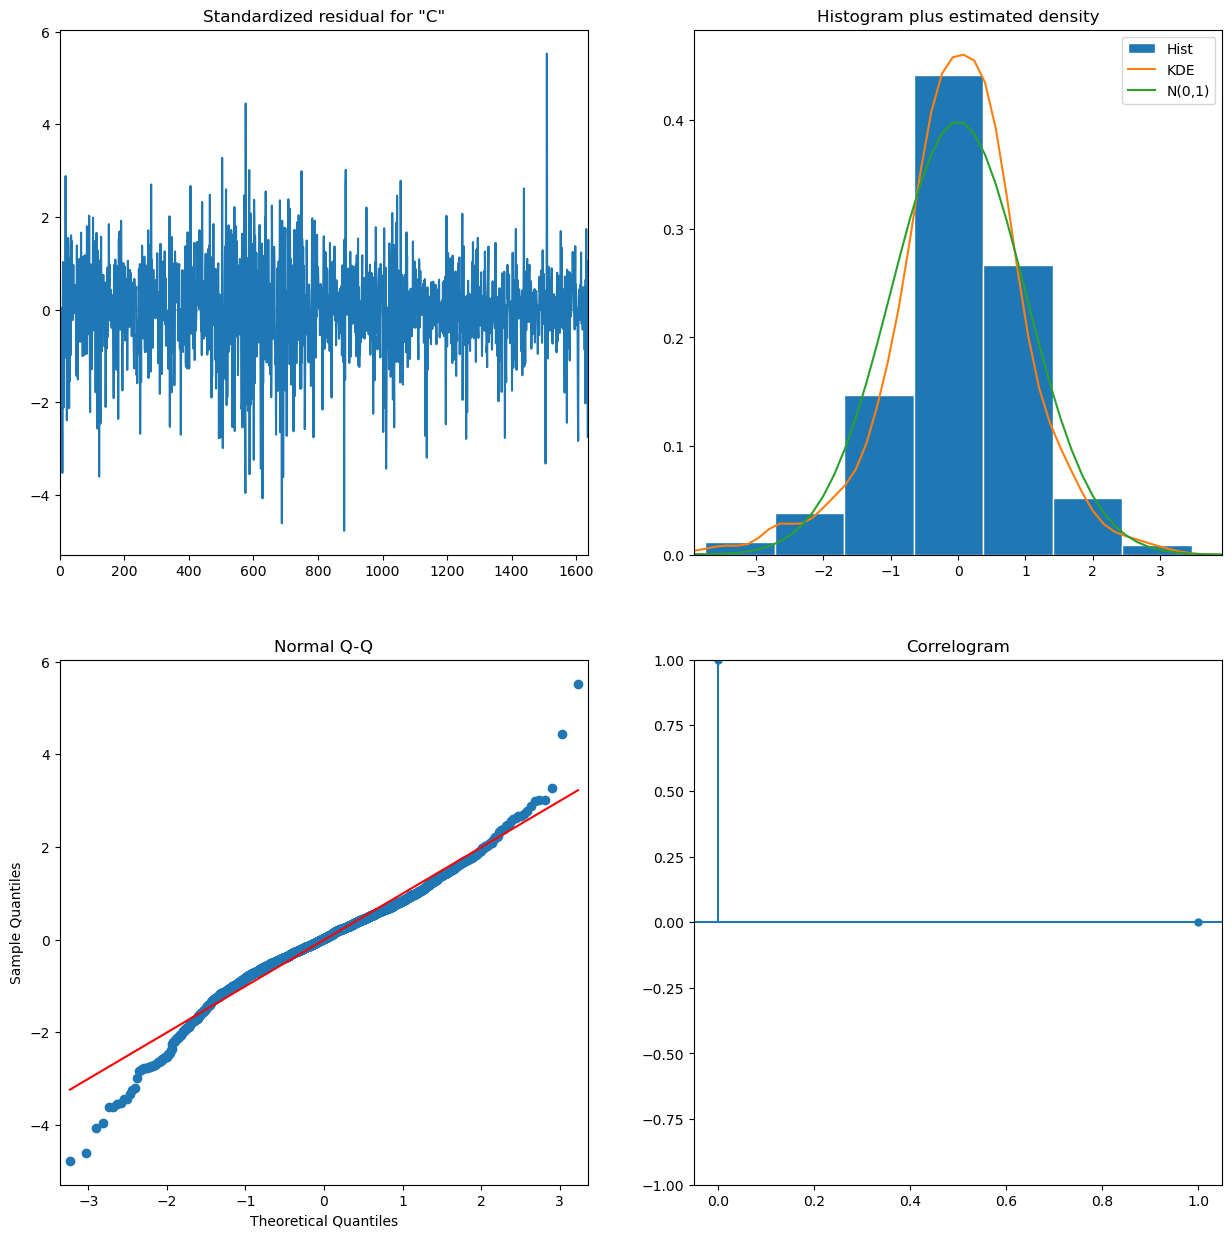

In [48]:
fig = plt.figure()
fig = result.plot_diagnostics(lags=1, fig=fig)

In [50]:
step = len(test)
p = result.predict(1)
p = p[0:len(test)]
p.index = test[:step].index
r = result.get_prediction(start =1, end = len(test))
rc = r.conf_int(method='endpoint', alpha=0.05)
rc.index = test[:step].index
rc['test'] = test
rc['pre'] = p
rc['diff'] = rc['test']-rc['pre']
rc['pdiff'] = ((rc['test']-rc['pre'])/rc['test'])*100
rc['corpre'] = rc['pre'] + rc['diff'].mean()
rc

,lower Close,upper Close,test,pre,diff,pdiff,corpre
1639,32.414110,33.765891,27.31,33.090000,-5.780000,-21.164410,27.271825
1640,32.718029,34.065686,27.26,33.391858,-6.131858,-22.493975,27.573682
1641,32.404891,33.751779,26.41,33.078335,-6.668335,-25.249282,27.260160
1642,31.992788,33.339448,26.33,32.666118,-6.336118,-24.064253,26.847943
1643,30.937734,32.284274,26.28,31.611004,-5.331004,-20.285403,25.792829
...,...,...,...,...,...,...,...
2517,27.338792,28.684517,26.37,28.011654,-1.641654,-6.225461,22.193479
2518,27.217918,28.563643,26.41,27.890780,-1.480780,-5.606893,22.072605
2519,26.778060,28.123785,26.46,27.450923,-0.990923,-3.744985,21.632748
2520,26.848703,28.194428,26.46,27.521565,-1.061565,-4.011962,21.703390


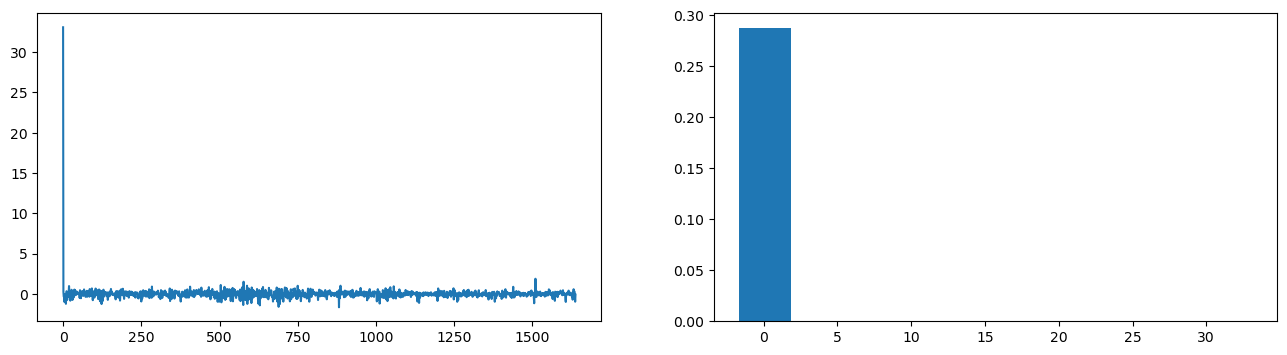

In [51]:
residuals = pd.DataFrame(result.resid)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals, density = True);

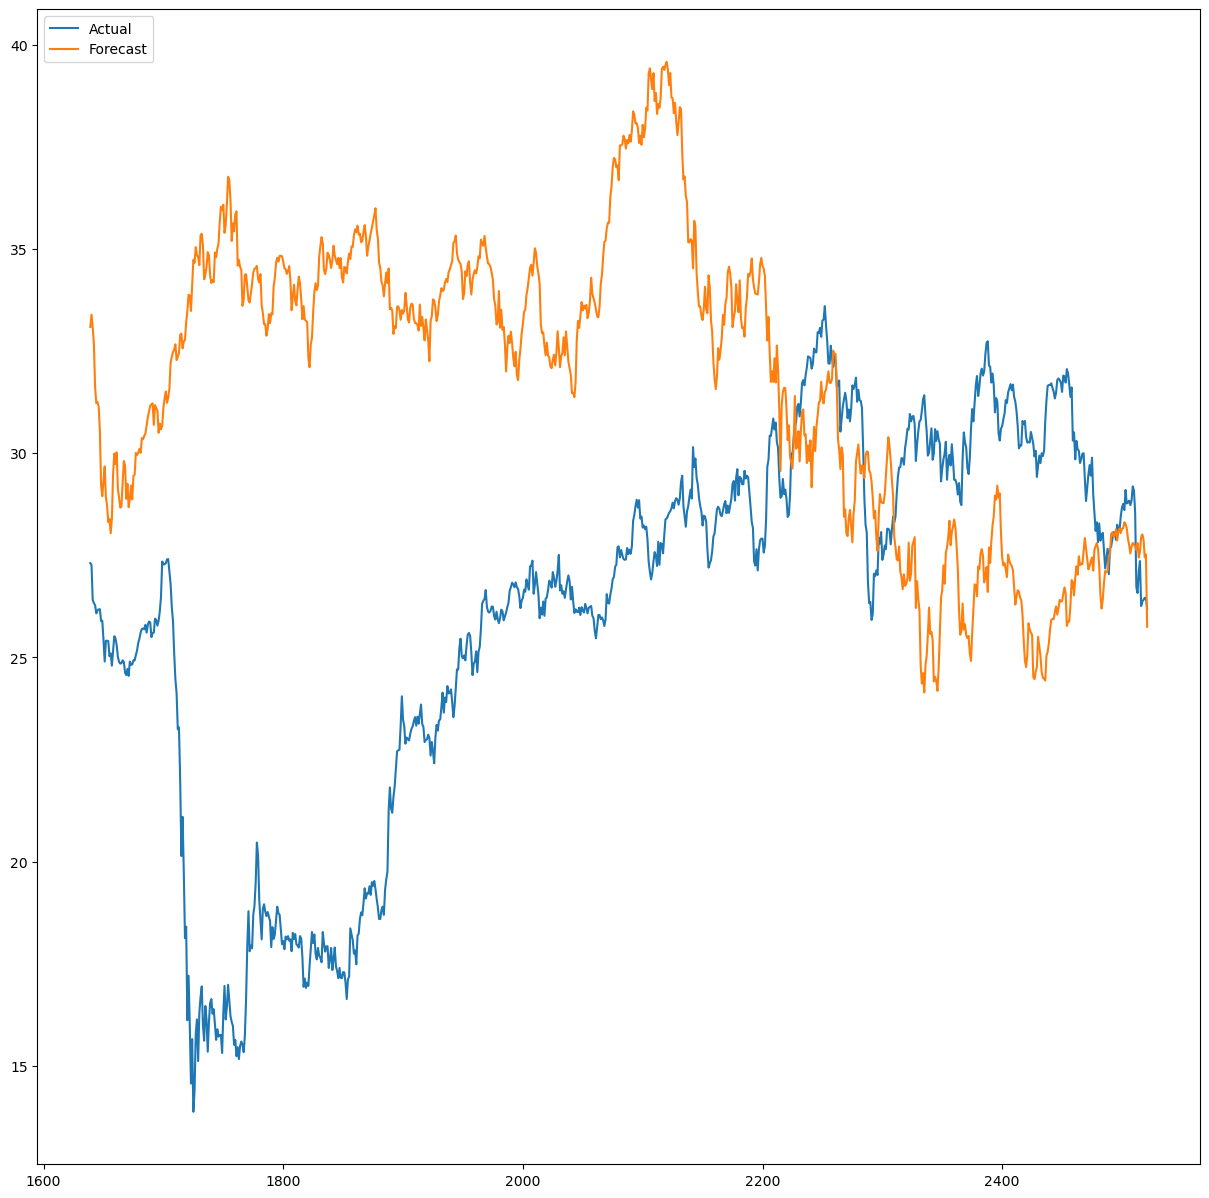

In [52]:
plt.figure()
plt.plot(test, label = 'Actual')
plt.plot(rc['pre'], label = 'Forecast')
plt.legend(loc ='upper left')

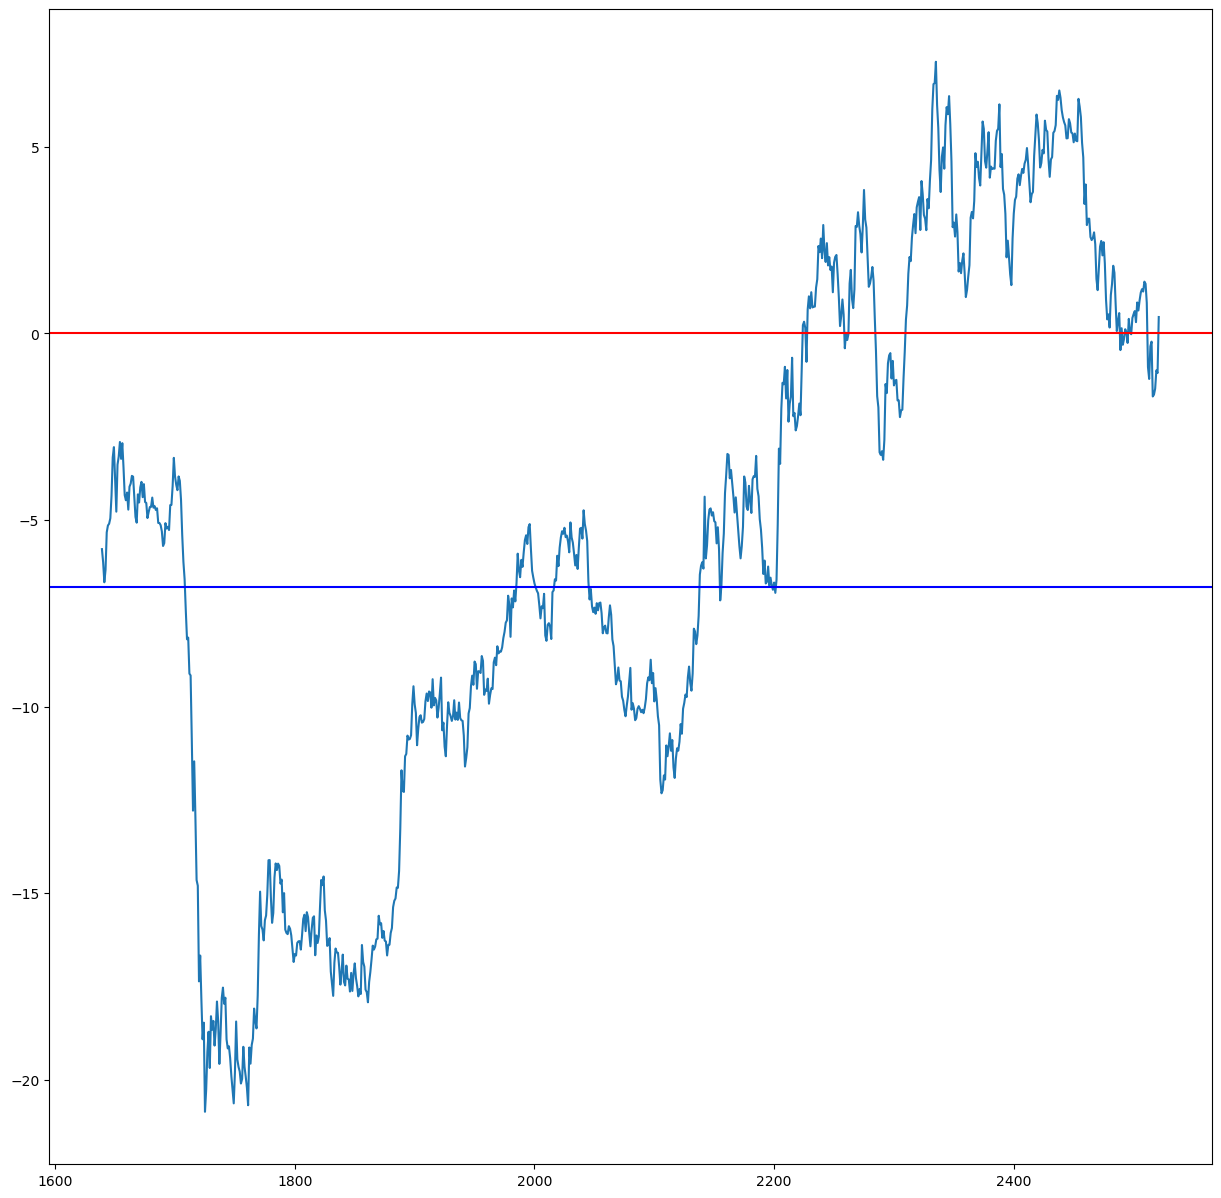

In [58]:
fig,ax1 = plt.subplots(1,1)
ax1.plot(rc['diff'])
ax1.axhline(y = 0, color = 'r', linestyle = '-')
ax1.axhline(y = ((max(rc['diff']) + min(rc['diff']))/2), color = 'b', linestyle = '-')

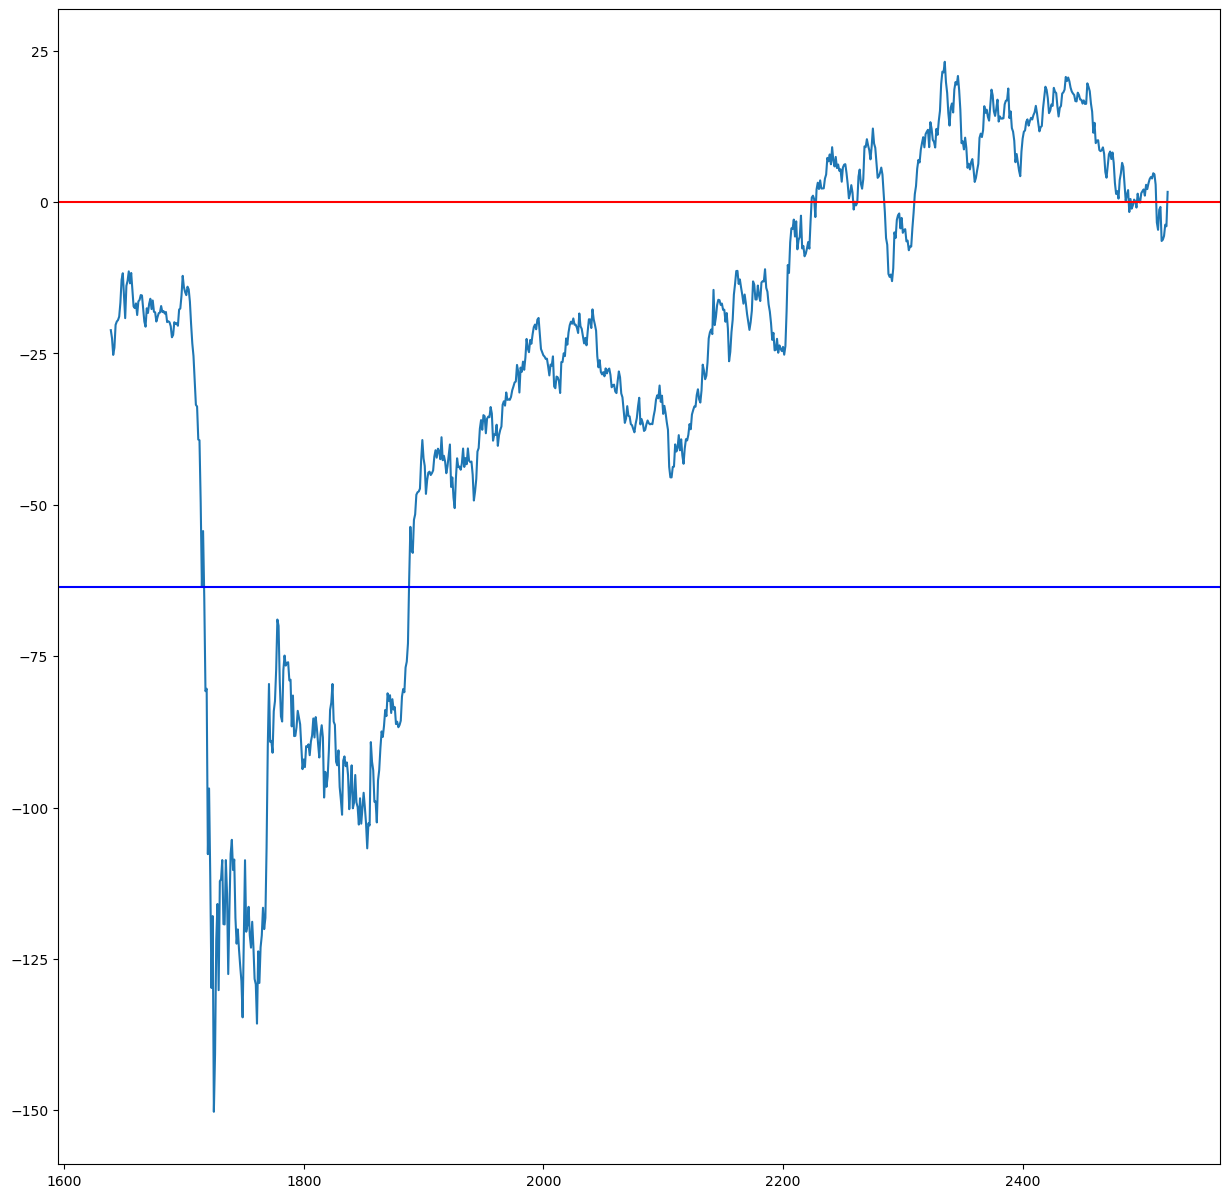

In [61]:
fig,ax1 = plt.subplots(1,1)
ax1.plot(rc['pdiff'])
ax1.axhline(y = 0, color = 'r', linestyle = '-')
ax1.axhline(y = ((max(rc['pdiff']) + min(rc['pdiff']))/2), color = 'b', linestyle = '-')